In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [3]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [4]:
df1.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
df1.shape

(7613, 5)

In [7]:
df2.shape

(3263, 4)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


(-0.5, 1599.5, 799.5, -0.5)

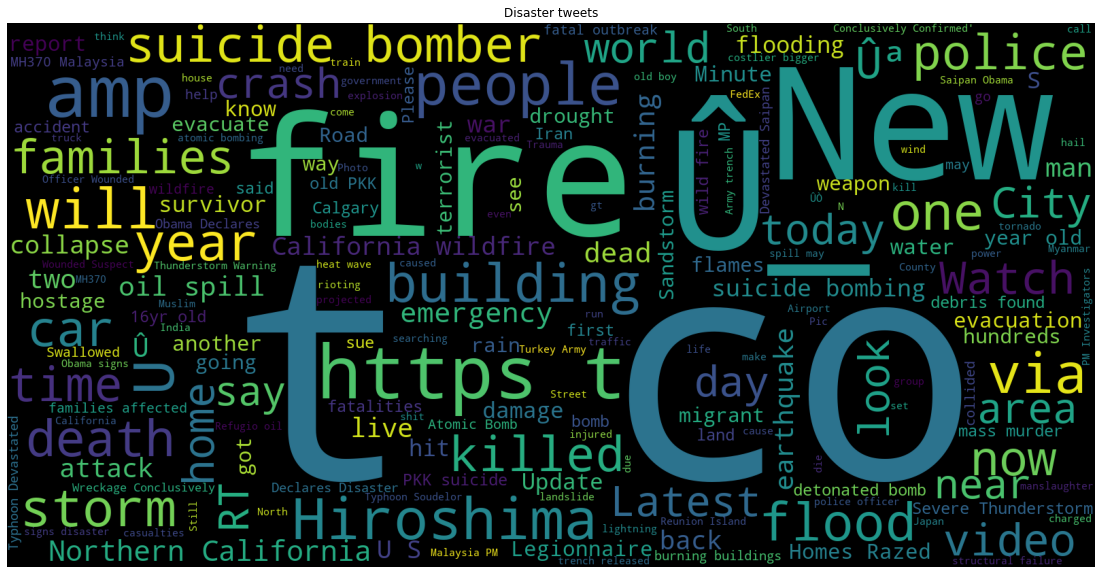

In [10]:
wd1 = pd.Series((df1.loc[df1['target']==1,'text']).tolist()).astype(str)
wordcloud1 = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(wd1))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud1)
plt.title("Disaster tweets")
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

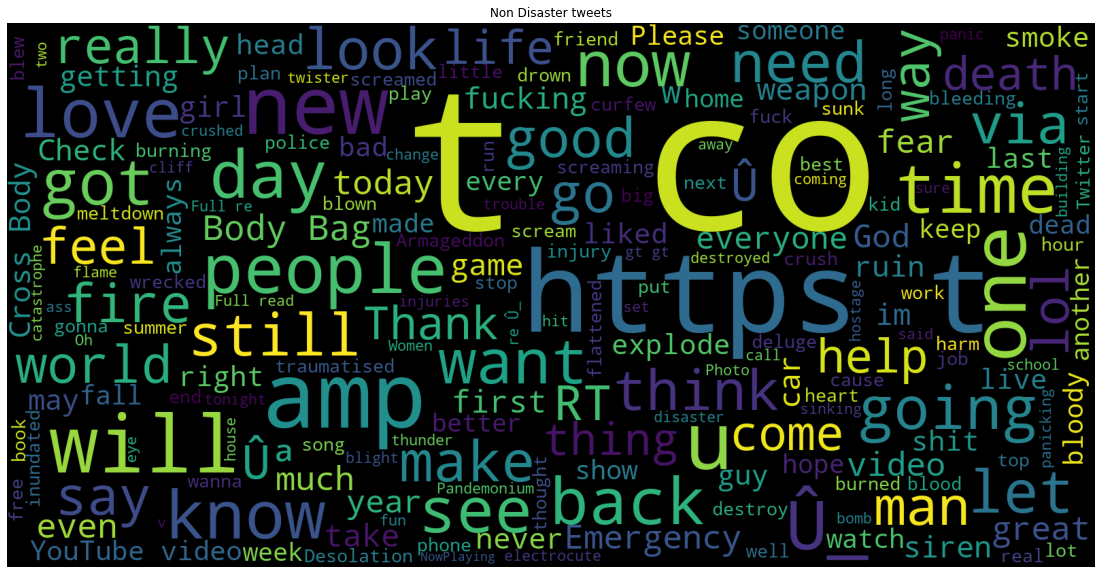

In [11]:
wd2 = pd.Series((df1.loc[df1['target']==0,'text']).tolist()).astype(str)
wordcloud2 = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(wd2))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud2)
plt.title("Non Disaster tweets")
plt.axis('off')

In [12]:
lemmatizer = WordNetLemmatizer()
corpus = []

In [13]:
for i in range(len(df1)):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))','URL',df1['text'][i])
    text = re.sub('@[^\s]+','USER',df1['text'][i])
    text = re.sub('[^a-zA-Z]',' ',df1['text'][i])
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(i) for i in text if not i in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus.append(text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(ngram_range=(1,2),max_features=35000)

In [15]:
df1 = df1.drop(['id','keyword','location'],axis=1)
index_df2 = df2['id']
df2 = df2.drop(['id','keyword','location'],axis=1)

In [16]:
df1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(7613, 35000)

In [19]:
y = df1['target']

# 1.Multinomial NB

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.01)

In [22]:
x_pred1 = nb.predict(X_train)
y_pred1 = nb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix
print("Training accuracy:",accuracy_score(y_train,x_pred1))
print("Testing accuracy:",accuracy_score(y_test,y_pred1))

Training accuracy: 0.954351395730706
Testing accuracy: 0.7754432042022325


# 2.Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
x_pred3 = lr.predict(X_train)
y_pred3 = lr.predict(X_test)

In [26]:
print("Training Accuracy:",accuracy_score(y_train,x_pred3))
print("Testing Accuracy:",accuracy_score(y_test,y_pred3))

Training Accuracy: 0.8985221674876848
Testing Accuracy: 0.7892317793827971


**Confusion Matrix**

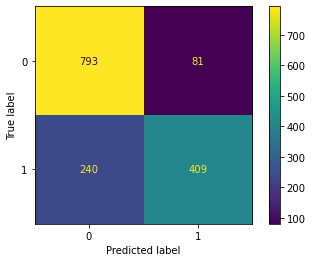

In [27]:
plot_confusion_matrix(lr,X_test,y_test,values_format='d')

# Submission

In [28]:
corpus1 = []

In [29]:
for i in range(len(df2)):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))','URL',df2['text'][i])
    text = re.sub('@[^\s]+','USER',df2['text'][i])
    text = re.sub('[^a-zA-Z]',' ',df2['text'][i])
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(i) for i in text if not i in set(stopwords.words('english'))]
    text = ' '.join(text)
    corpus1.append(text)

In [30]:
test = cv.fit_transform(corpus1).toarray()

In [31]:
predictions = nb.predict(test)
output = pd.DataFrame({'id':index_df2,'target':predictions})
output.to_csv('submission.csv',index=False)

In [32]:
pd.DataFrame(predictions).shape

(3263, 1)

# Pickle model

In [33]:
from pickle import dump,load
tfid = 'tfid.nav'
gnb = 'gnb.nav'

In [34]:
dump(cv,open(tfid,'wb'))
dump(nb,open(gnb,'wb'))

In [35]:
def preprocess(raw_mess):
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))','URL', raw_mess)
    text = re.sub('@[^\s]+','USER', raw_mess)
    text = re.sub('[^a-zA-Z]',' ',raw_mess)
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(i) for i in text if not i in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [36]:
def predict(mess):
    vect = load(open(tfid,'rb'))
    classifier = load(open(gnb,'rb'))
    clean = preprocess(mess)
    clean_encoded = vect.transform([clean])
    pred = classifier.predict(clean_encoded)
    return pred

In [38]:
tweet = input("Enter a tweet: ")
prediction = predict(tweet)
if prediction==1:
    print("It is a disastrous tweet")
else:
    print("It is a normal tweet")

Enter a tweet: Chennai suffers a Earthquake of 5.1 recter
It is a disastrous tweet
